Русакова Дарья, ЭК-51, Вариант-6

In [1]:
import pickle
input = open('data_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [2]:
X_train.head(5)

,"Trade_are,_sq_m",Number_of_employees_in_the_store,Google_rating,Average_check,Average_income_of_the_population_UAH,The_average_population,Fast_food,Takeaway_coffee,Pizzeria,Highway_street,Intra-quarter_road
44,3.218876,1.0,1.098612,4.484019,9984.0,7517.0,0.0,0.0,0.938463,1.0,0.0
32,3.546163,3.0,1.098612,4.506233,12090.0,3287.0,0.0,0.0,0.000000,1.0,0.0
63,3.091042,1.0,1.360977,4.594413,11115.0,8973.0,0.0,0.0,0.000000,1.0,1.0
7,3.465736,3.0,1.526056,4.887412,11310.0,12261.0,0.0,1.0,0.000000,0.0,1.0
53,3.638638,2.0,1.386294,4.617198,9672.0,11365.0,1.0,0.0,0.000000,0.0,1.0


In [3]:
f = ['Number_of_employees_in_the_store','Trade_are,_sq_m','Pizzeria']
X_train = X_train[f]
X_test = X_test[f]
X_train.head(5)

,Number_of_employees_in_the_store,"Trade_are,_sq_m",Pizzeria
44,1.0,3.218876,0.938463
32,3.0,3.546163,0.000000
63,1.0,3.091042,0.000000
7,3.0,3.465736,0.000000
53,2.0,3.638638,0.000000


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(y_train)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

In [7]:
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/frame

In [8]:
rnn = Sequential()

rnn.add(Dense(4, activation = 'tanh', input_dim = 3))

rnn.add(Dense(2, activation = 'tanh'))

rnn.add(Dense(1, activation = 'linear'))

rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [9]:
rnn.fit(X_train, y_train, batch_size = 2, epochs = 20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
55/55 [==============================] - 0s 4ms/sample - loss: 0.8494 - acc: 0.0000e+00
Epoch 2/20
55/55 [==============================] - 0s 2ms/sample - loss: 0.7495 - acc: 0.0000e+00
Epoch 3/20
55/55 [==============================] - 0s 2ms/sample - loss: 0.6748 - acc: 0.0000e+00
Epoch 4/20
55/55 [==============================] - 0s 2ms/sample - loss: 0.6213 - acc: 0.0000e+00
Epoch 5/20
55/55 [==============================] - 0s 2ms/sample - loss: 0.5913 - acc: 0.0000e+00
Epoch 6/20
55/55 [==============================] - 0s 3ms/sample - loss: 0.5640 - acc: 0.0000e+00
Epoch 7/20
55/55 [==============================] - 0s 2ms/sample - loss: 0.5483 - acc: 0.0000e+00
Epoch 8/20
55/55 [==============================] - 0s 2ms/sample - loss: 0.5364 - acc: 0.0000e+00
Epoch 9/20
55/55 [==============================] - 0s 3ms/sample - loss: 0.5292 - acc: 0.0000e+00
Epoch 10/20
55/55 [==============================] - 0s 2ms/s

In [10]:
y_pred = rnn.predict(X_test)

In [11]:
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [12]:
from math import sqrt
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn.predict(X_train)))), sqrt(mean_squared_error(y_test, y_hat))

(0.4694280585567572, 0.4606831414007535)

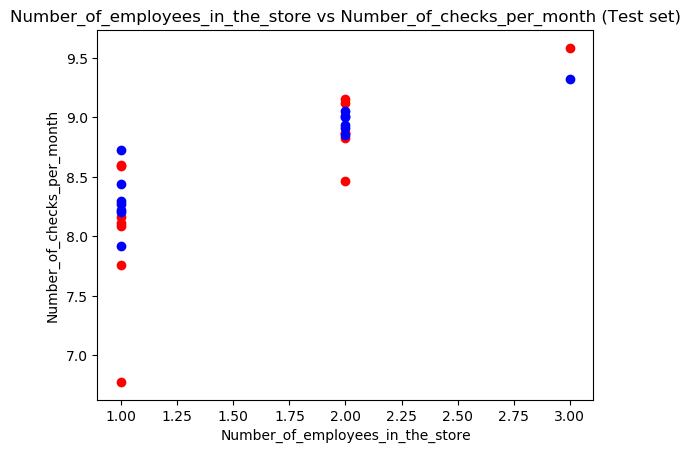

In [13]:
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], y_hat, 'bo')
plt.title('Number_of_employees_in_the_store vs Number_of_checks_per_month (Test set)')
plt.xlabel('Number_of_employees_in_the_store')
plt.ylabel('Number_of_checks_per_month')
plt.show()

При использовании значимых факторов нейронная сеть, судя по среднеквадратической ошибке, стала намного лучше. Если сравнивать результаты нейронной сети и многофакторной регрессии, то относительно среднеквадратической ошибки нейронная сеть лучше справилась с построением модели. 